<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br> Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 5.  Соревнование Kaggle "Catch Me If You Can"

На этой неделе мы вспомним про концепцию стохастического градиентного спуска и опробуем классификатор Scikit-learn SGDClassifier, который работает намного быстрее на больших выборках, чем алгоритмы, которые мы тестировали на 4 неделе. Также мы познакомимся с данными [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle по идентификации пользователей и сделаем в нем первые посылки. По итогам этой недели дополнительные баллы получат те, кто попадет в топ-30 публичного лидерборда соревнования.

**В этой части проекта Вам могут быть полезны видеозаписи следующих лекций курса "Обучение на размеченных данных":**
   - [Стохатический градиентный спуск](https://www.coursera.org/learn/supervised-learning/lecture/xRY50/stokhastichieskii-ghradiientnyi-spusk)
   - [Линейные модели. Sklearn.linear_model. Классификация](https://www.coursera.org/learn/supervised-learning/lecture/EBg9t/linieinyie-modieli-sklearn-linear-model-klassifikatsiia)
   
**Также рекомендуется вернуться и просмотреть [задание](https://www.coursera.org/learn/supervised-learning/programming/t2Idc/linieinaia-rieghriessiia-i-stokhastichieskii-ghradiientnyi-spusk) "Линейная регрессия и стохастический градиентный спуск" 1 недели 2 курса специализации.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите тетрадку в соответствующем Peer Review. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/1pLsegkAICL9PzOLyAeH9DmDOBfktte0l8JW75uWcTng). 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import os
import pickle
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

**Считаем данные [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) в DataFrame train_df и test_df (обучающая и тестовая выборки).**

In [2]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = r'C:\Users\Дмитрий Мошкин\Documents\GitHub\moshkin\MFTI_Yandex_DA_specialisation\6 course\catch-me-if-you-can'

In [3]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_sessions.csv'),
                       index_col='session_id')
test_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_sessions.csv'),
                      index_col='session_id')

In [4]:
train_df.head()

site1                time1  site2                time2    site3  \
session_id                                                                    
1             718  2014-02-20 10:02:45    NaN                  NaN      NaN   
2             890  2014-02-22 11:19:50  941.0  2014-02-22 11:19:50   3847.0   
3           14769  2013-12-16 16:40:17   39.0  2013-12-16 16:40:18  14768.0   
4             782  2014-03-28 10:52:12  782.0  2014-03-28 10:52:42    782.0   
5              22  2014-02-28 10:53:05  177.0  2014-02-28 10:55:22    175.0   

                          time3    site4                time4  site5  \
session_id                                                             
1                           NaN      NaN                  NaN    NaN   
2           2014-02-22 11:19:51    941.0  2014-02-22 11:19:51  942.0   
3           2013-12-16 16:40:19  14769.0  2013-12-16 16:40:19   37.0   
4           2014-03-28 10:53:12    782.0  2014-03-28 10:53:42  782.0   
5           2014-02-28 10:55:22    178.0  2014-02-28 10:55:23  177.0   

                          time5  ...                time6    site7  \
session_id                       ...                                 
1                           NaN  ...                  NaN      NaN   
2           2014-02-22 11:19:51  ...  2014-02-22 11:19:51   3847.0   
3           2013-12-16 16:40:19  ...  2013-12-16 16:40:19  14768.0   
4           2014-03-28 10:54:12  ...  2014-03-28 10:54:42    782.0   
5           2014-02-28 10:55:23  ...  2014-02-28 10:55:59    175.0   

                          time7    site8                time8    site9  \
session_id                                                               
1                           NaN      NaN                  NaN      NaN   
2           2014-02-22 11:19:52   3846.0  2014-02-22 11:19:52   1516.0   
3           2013-12-16 16:40:20  14768.0  2013-12-16 16:40:21  14768.0   
4           2014-03-28 10:55:12    782.0  2014-03-28 10:55:42    782.0   
5           2014-02-28 10:55:59    177.0  2014-02-28 10:55:59    177.0   

                          time9   site10               time10 target  
session_id                                                            
1                           NaN      NaN                  NaN      0  
2           2014-02-22 11:20:15   1518.0  2014-02-22 11:20:16      0  
3           2013-12-16 16:40:22  14768.0  2013-12-16 16:40:24      0  
4           2014-03-28 10:56:12    782.0  2014-03-28 10:56:42      0  
5           2014-02-28 10:57:06    178.0  2014-02-28 10:57:11      0  

[5 rows x 21 columns]

**Объединим обучающую и тестовую выборки – это понадобится, чтоб вместе потом привести их к разреженному формату.**

In [5]:
train_test_df = pd.concat([train_df, test_df])

В обучающей выборке видим следующие признаки:
    - site1 – индекс первого посещенного сайта в сессии
    - time1 – время посещения первого сайта в сессии
    - ...
    - site10 – индекс 10-го посещенного сайта в сессии
    - time10 – время посещения 10-го сайта в сессии
    - user_id – ID пользователя
    
Сессии пользователей выделены таким образом, что они не могут быть длинее получаса или 10 сайтов. То есть сессия считается оконченной либо когда пользователь посетил 10 сайтов подряд, либо когда сессия заняла по времени более 30 минут. 

**Посмотрим на статистику признаков.**

Пропуски возникают там, где сессии короткие (менее 10 сайтов). Скажем, если человек 1 января 2015 года посетил *vk.com* в 20:01, потом *yandex.ru* в 20:29, затем *google.com* в 20:33, то первая его сессия будет состоять только из двух сайтов (site1 – ID сайта *vk.com*, time1 – 2015-01-01 20:01:00, site2 – ID сайта  *yandex.ru*, time2 – 2015-01-01 20:29:00, остальные признаки – NaN), а начиная с *google.com* пойдет новая сессия, потому что уже прошло более 30 минут с момента посещения *vk.com*.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
site1     253561 non-null int64
time1     253561 non-null object
site2     250098 non-null float64
time2     250098 non-null object
site3     246919 non-null float64
time3     246919 non-null object
site4     244321 non-null float64
time4     244321 non-null object
site5     241829 non-null float64
time5     241829 non-null object
site6     239495 non-null float64
time6     239495 non-null object
site7     237297 non-null float64
time7     237297 non-null object
site8     235224 non-null float64
time8     235224 non-null object
site9     233084 non-null float64
time9     233084 non-null object
site10    231052 non-null float64
time10    231052 non-null object
target    253561 non-null int64
dtypes: float64(9), int64(2), object(10)
memory usage: 42.6+ MB


In [7]:
test_df.head()

site1                time1   site2                time2  site3  \
session_id                                                                   
1              29  2014-10-04 11:19:53    35.0  2014-10-04 11:19:53   22.0   
2             782  2014-07-03 11:00:28   782.0  2014-07-03 11:00:53  782.0   
3              55  2014-12-05 15:55:12    55.0  2014-12-05 15:55:13   55.0   
4            1023  2014-11-04 10:03:19  1022.0  2014-11-04 10:03:19   50.0   
5             301  2014-05-16 15:05:31   301.0  2014-05-16 15:05:32  301.0   

                          time3  site4                time4  site5  \
session_id                                                           
1           2014-10-04 11:19:54  321.0  2014-10-04 11:19:54   23.0   
2           2014-07-03 11:00:58  782.0  2014-07-03 11:01:06  782.0   
3           2014-12-05 15:55:14   55.0  2014-12-05 15:56:15   55.0   
4           2014-11-04 10:03:20  222.0  2014-11-04 10:03:21  202.0   
5           2014-05-16 15:05:33   66.0  2014-05-16 15:05:39   67.0   

                          time5   site6                time6   site7  \
session_id                                                             
1           2014-10-04 11:19:54  2211.0  2014-10-04 11:19:54  6730.0   
2           2014-07-03 11:01:09   782.0  2014-07-03 11:01:10   782.0   
3           2014-12-05 15:56:16    55.0  2014-12-05 15:56:17    55.0   
4           2014-11-04 10:03:21  3374.0  2014-11-04 10:03:22    50.0   
5           2014-05-16 15:05:40    69.0  2014-05-16 15:05:40    70.0   

                          time7  site8                time8    site9  \
session_id                                                             
1           2014-10-04 11:19:54   21.0  2014-10-04 11:19:54  44582.0   
2           2014-07-03 11:01:23  782.0  2014-07-03 11:01:29    782.0   
3           2014-12-05 15:56:18   55.0  2014-12-05 15:56:19   1445.0   
4           2014-11-04 10:03:22   48.0  2014-11-04 10:03:22     48.0   
5           2014-05-16 15:05:40   68.0  2014-05-16 15:05:40     71.0   

                          time9   site10               time10  
session_id                                                     
1           2014-10-04 11:20:00  15336.0  2014-10-04 11:20:00  
2           2014-07-03 11:01:30    782.0  2014-07-03 11:01:53  
3           2014-12-05 15:56:33   1445.0  2014-12-05 15:56:36  
4           2014-11-04 10:03:23   3374.0  2014-11-04 10:03:23  
5           2014-05-16 15:05:40    167.0  2014-05-16 15:05:44

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82797 entries, 1 to 82797
Data columns (total 20 columns):
site1     82797 non-null int64
time1     82797 non-null object
site2     81308 non-null float64
time2     81308 non-null object
site3     80075 non-null float64
time3     80075 non-null object
site4     79182 non-null float64
time4     79182 non-null object
site5     78341 non-null float64
time5     78341 non-null object
site6     77566 non-null float64
time6     77566 non-null object
site7     76840 non-null float64
time7     76840 non-null object
site8     76151 non-null float64
time8     76151 non-null object
site9     75484 non-null float64
time9     75484 non-null object
site10    74806 non-null float64
time10    74806 non-null object
dtypes: float64(9), int64(1), object(10)
memory usage: 13.3+ MB


**В обучающей выборке – 2297 сессий одного пользователя (Alice) и 251264 сессий – других пользователей, не Элис. Дисбаланс классов очень сильный, и смотреть на долю верных ответов (accuracy) непоказательно.**

In [9]:
train_df['target'].value_counts()

0    251264
1      2297
Name: target, dtype: int64

**Пока для прогноза будем использовать только индексы посещенных сайтов. Индексы нумеровались с 1, так что заменим пропуски на нули.**

In [10]:
train_test_df_sites = train_test_df[['site%d' % i for i in range(1, 11)]].fillna(0).astype('int')

In [11]:
train_test_df_sites.head(10)

site1  site2  site3  site4  site5  site6  site7  site8  site9  \
session_id                                                                  
1             718      0      0      0      0      0      0      0      0   
2             890    941   3847    941    942   3846   3847   3846   1516   
3           14769     39  14768  14769     37     39  14768  14768  14768   
4             782    782    782    782    782    782    782    782    782   
5              22    177    175    178    177    178    175    177    177   
6             570     21    570     21     21      0      0      0      0   
7             803     23   5956  17513     37     21    803  17514  17514   
8              22     21     29   5041  14422     23     21   5041  14421   
9             668    940    942    941    941    942    940     23     21   
10           3700    229    570     21    229     21     21     21   2336   

            site10  
session_id          
1                0  
2             1518  
3            14768  
4              782  
5              178  
6                0  
7            17514  
8            14421  
9               22  
10            2044

**Создайте разреженные матрицы *X_train_sparse* и *X_test_sparse* аналогично тому, как мы это делали ранее. Используйте объединенную матрицу *train_test_df_sites*, потом разделите обратно на обучающую и тестовую части.**

Обратите внимание на то, что в  сессиях меньше 10 сайтов  у нас остались нули, так что первый признак (сколько раз попался 0) по смыслу отличен от остальных (сколько раз попался сайт с индексом $i$). Поэтому первый столбец разреженной матрицы надо будет удалить.

**Выделите в отдельный вектор *y* ответы на обучающей выборке.**

In [12]:
def to_sparse(X) :
    num_cols = X.shape[1]
    len_flat = X.shape[0] * X.shape[1]
    
    return csr_matrix((np.ones(len_flat, dtype=int),
                       X.reshape(-1), 
                       np.arange(0, len_flat+1, num_cols))
                     )[:, 1:]

In [13]:
values2sparce = train_test_df_sites.values

train_test_sparse = to_sparse(values2sparce)

X_train_sparse = train_test_sparse[ : train_df.shape[0], :]
X_test_sparse = train_test_sparse[train_df.shape[0] : , :]
y = train_df.target.values

**<font color='red'>Вопрос 1. </font> Выведите размерности матриц *X_train_sparse* и *X_test_sparse* – 4 числа на одной строке через пробел: число строк и столбцов матрицы *X_train_sparse*, затем число строк и столбцов матрицы *X_test_sparse*.**

In [14]:
print(X_train_sparse.shape[0], X_train_sparse.shape[1], 
      X_test_sparse.shape[0], X_test_sparse.shape[1])

253561 48371 82797 48371


**Сохраним в pickle-файлы объекты *X_train_sparse*, *X_test_sparse* и *y* (последний – в файл *kaggle_data/train_target.pkl*).**

In [15]:
with open(os.path.join(PATH_TO_DATA, 'X_train_sparse.pkl'), 'wb') as X_train_sparse_pkl:
    pickle.dump(X_train_sparse, X_train_sparse_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'X_test_sparse.pkl'), 'wb') as X_test_sparse_pkl:
    pickle.dump(X_test_sparse, X_test_sparse_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'train_target.pkl'), 'wb') as train_target_pkl:
    pickle.dump(y, train_target_pkl, protocol=2)

**Разобьем обучающую выборку на 2 части в пропорции 7/3, причем не перемешивая. Исходные данные упорядочены по времени, тестовая выборка по времени четко отделена от обучающей, это же соблюдем и здесь.**

In [15]:
train_share = int(.7 * X_train_sparse.shape[0])
X_train, y_train = X_train_sparse[:train_share, :], y[:train_share]
X_valid, y_valid  = X_train_sparse[train_share:, :], y[train_share:]

**Создайте объект `sklearn.linear_model.SGDClassifier` с логистической функцией потерь и параметром *random_state*=17. Остальные параметры оставьте по умолчанию, разве что *n_jobs*=-1 никогда не помешает. Обучите  модель на выборке `(X_train, y_train)`.**

In [16]:
sgd_logit = SGDClassifier(loss='log', random_state=17, n_jobs=-1)
sgd_logit.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=17, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

**Сделайте прогноз в виде предсказанных вероятностей того, что это сессия Элис, на отложенной выборке *(X_valid, y_valid)*.**

In [17]:
logit_valid_pred_proba = sgd_logit.predict_proba(X_valid)[:,1] 

**<font color='red'>Вопрос 2. </font> Посчитайте ROC AUC логистической регрессии, обученной с помощью стохастического градиентного спуска, на отложенной выборке. Округлите до 3 знаков после разделителя.**

In [18]:
round(roc_auc_score(y_valid, logit_valid_pred_proba), 3)

0.934

**Сделайте прогноз в виде предсказанных вероятностей отнесения к классу 1 для тестовой выборки с помощью той же *sgd_logit*, обученной уже на всей обучающей выборке (а не на 70%).**

In [19]:
%%time
sgd_logit.fit(X_train_sparse, y)
logit_test_pred_proba = sgd_logit.predict_proba(X_test_sparse)[:,1] 

Wall time: 298 ms


**Запишите ответы в файл и сделайте посылку на Kaggle. Дайте своей команде (из одного человека) на Kaggle говорящее название – по шаблону "[YDF & MIPT] Coursera_Username", чтоб можно было легко идентифицировать Вашу посылку на [лидерборде](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/leaderboard/public).**

**Результат, который мы только что получили, соответствует бейзлайну "SGDCLassifer" на лидерборде, задача на эту неделю – как минимум его побить.**

In [20]:
def write_to_submission_file(predicted_labels, out_file,
                             target='target', index_label="session_id"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [22]:
write_to_submission_file(logit_test_pred_proba, os.path.join(PATH_TO_DATA, 'submit_001.csv'))

## Критерии оценки работы (только для Peer Review в специализации):
- Правильные ли получились размерности матриц в п. 1? (max. 2 балла)
- Правильным ли получилось значения ROC AUC в п. 2? (max. 4 балла)
- Побит ли бенчмарк "sgd_logit_benchmark.csv" на публичной части рейтинга в соревновании Kaggle? (max. 2 балла)
- Побит ли бенчмарк "Logit +3 features" на публичной части рейтинга в соревновании Kaggle? (max. 2 балла)

## Пути улучшения
На этой неделе дается много времени на соревнование. Не забывайте вносить хорошие идеи, к которым Вы пришли по ходу соревнования, в описание финального проекта (`html`, `pdf` или `ipynb`). Это только в случае, если вы проходите специализацию.
Что можно попробовать:
 - Использовать ранее построенные признаки для улучшения модели (проверить их можно на меньшей выборке по 150 пользователям, отделив одного из пользователей от остальных – это быстрее)
 - Настроить параметры моделей (например, коэффициенты регуляризации)
 - Если позволяют мощности (или хватает терпения), можно попробовать смешивание (блендинг) ответов бустинга и линейной модели. [Вот](http://mlwave.com/kaggle-ensembling-guide/) один из самых известных тьюториалов по смешиванию ответов алгоритмов, также хороша [статья](https://alexanderdyakonov.wordpress.com/2017/03/10/cтекинг-stacking-и-блендинг-blending) Александра Дьяконова
 - Обратите внимание, что в соревновании также даны исходные данные о посещенных веб-страницах Элис и остальными 1557 пользователями (*train.zip*). По этим данным можно сформировать свою обучающую выборку. 

На 6 неделе мы пройдем большой тьюториал по Vowpal Wabbit и попробуем его в деле, на данных соревнования.

In [21]:
def validator(estimator, X, y, X_test, train_size=.7, submit=False, n_submit=1) :
    
    train_share = int(train_size * X.shape[0])
    X_train, y_train = X[:train_share, :], y[:train_share]
    X_valid, y_valid  = X[train_share:, :], y[train_share:]

    estimator.fit(X_train, y_train)
    logit_valid_pred_proba = estimator.predict_proba(X_valid)[:,1] 

    print(f'valid ROC AUC = {round(roc_auc_score(y_valid, logit_valid_pred_proba), 4)}')

    if submit :
        estimator.fit(X, y)
        logit_test_pred_proba = estimator.predict_proba(X_test)[:,1] 
        write_to_submission_file(logit_test_pred_proba, os.path.join(PATH_TO_DATA, f'submit_{n_submit:03d}.csv'))
    
    return None

In [22]:
validator(SGDClassifier(loss='log', random_state=17, n_jobs=-1), 
          X_train_sparse, y, X_test_sparse, train_size=.7, submit=False)

valid ROC AUC = 0.9338


- подберём гиперпараметры SGDClassifier, обеспечивающее лучшее качество классификации:

In [23]:
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV

def custom_auc(ground_truth, predictions):
    fpr, tpr, _ = roc_curve(ground_truth, predictions, pos_label=1) 
    return auc(fpr, tpr)
      
my_auc = make_scorer(custom_auc, greater_is_better=True, needs_proba=True)

skf = StratifiedKFold(n_splits=3, shuffle=True)

In [35]:
param_grid_ = {'loss': ['log'], 
               'alpha': [1e-4, 3e-4, 1.5e-4, 2e-4, 4e-4], #np.linspace(1e-5, 5e-5, 20), 
               'class_weight': [{0:1, 1:4}, {0:1, 1:6}, {0:1, 1:8}, {0:1, 1:10}],
               'tol' : [1e-3, 1e-4, 1e-5, 1e-6],
               #'n_jobs': [-1]
               #'random_state': [17] 
               }

grid_searcher = RandomizedSearchCV(estimator=SGDClassifier(), param_distributions=param_grid_, scoring=my_auc, cv=skf, n_iter=50)
grid_searcher.fit(X_train_sparse, y)

print(grid_searcher.best_params_ , grid_searcher.best_score_)

{'tol': 0.0001, 'loss': 'log', 'class_weight': {0: 1, 1: 8}, 'alpha': 0.0001} 0.9575011941804376


In [ ]:
validator(SGDClassifier(loss='log', class_weight={0:1, 1:10}, alpha=1e-4, random_state=17, n_jobs=-1, tol=1e-6), 
          X_train_sparse, y, X_test_sparse, train_size=.7, submit=True, n_submit=2)

- качество на тестовой выборке не улучшилось, обогатим датасет дополнительными параметрами
- посмотрим на распределение каждого из признаков у Элис и остальных пользователей

In [ ]:
from scipy.sparse import hstack
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
train_test_df['n_unique'] = train_test_df[['site%d' % i for i in range(1, 11)]].apply(pd.Series.nunique, axis=1)
train_test_df['n_unique'] = train_test_df['n_unique'] - (train_test_df['site10'] == 0).astype(int)

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
train_test_df[train_test_df.target==1].n_unique.hist(bins=19)
plt.subplot(122)
train_test_df[train_test_df.target==0].n_unique.hist(bins=19)
plt.show()

In [ ]:
train_test_df['time1'] = pd.to_datetime(train_test_df.time1)

train_test_df['start_year'] = train_test_df.time1.dt.year
train_test_df['start_month'] = train_test_df.time1.dt.month
train_test_df['start_hour'] = train_test_df.time1.dt.hour
train_test_df['start_weekday'] = train_test_df.time1.dt.weekday

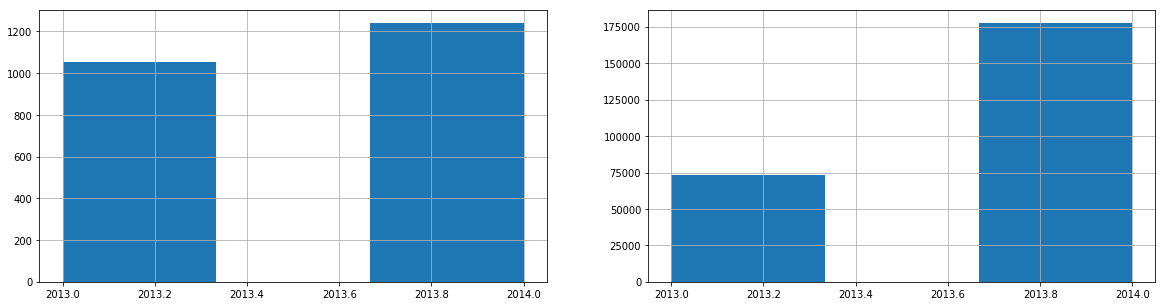

In [32]:
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
train_test_df[train_test_df.target==1].start_year.hist(bins=3)
plt.subplot(122)
train_test_df[train_test_df.target==0].start_year.hist(bins=3)
plt.show()

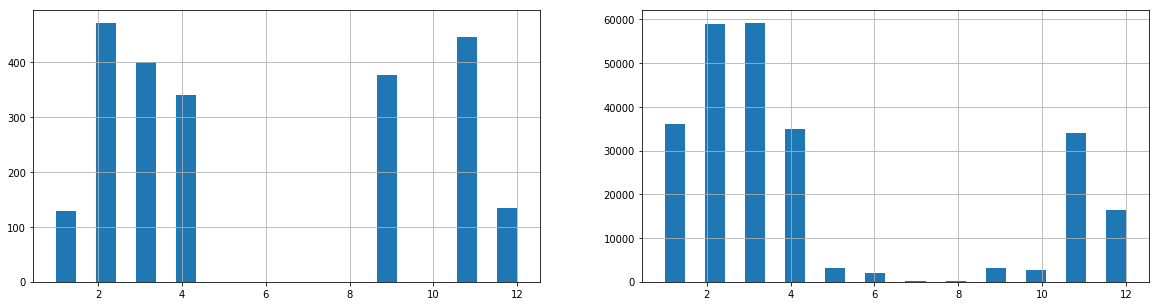

In [33]:
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
train_test_df[train_test_df.target==1].start_month.hist(bins=23)
plt.subplot(122)
train_test_df[train_test_df.target==0].start_month.hist(bins=23)
plt.show()

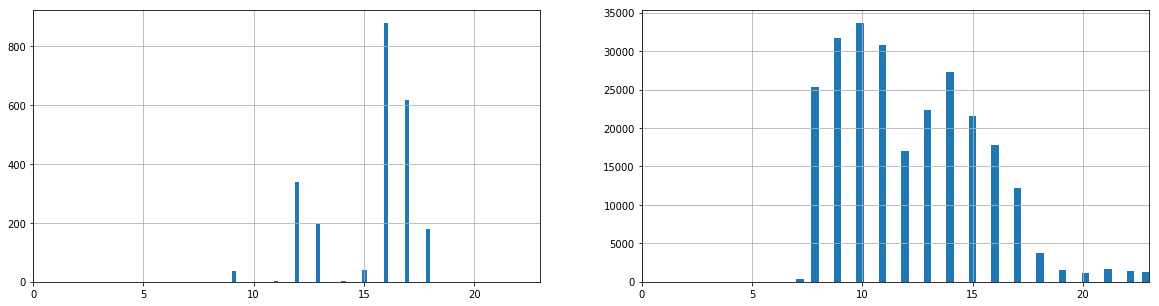

In [34]:
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
train_test_df[train_test_df.target==1].start_hour.hist(bins=47)
plt.xlim([0,23])
plt.subplot(122)
train_test_df[train_test_df.target==0].start_hour.hist(bins=47)
plt.xlim([0,23])
plt.show()

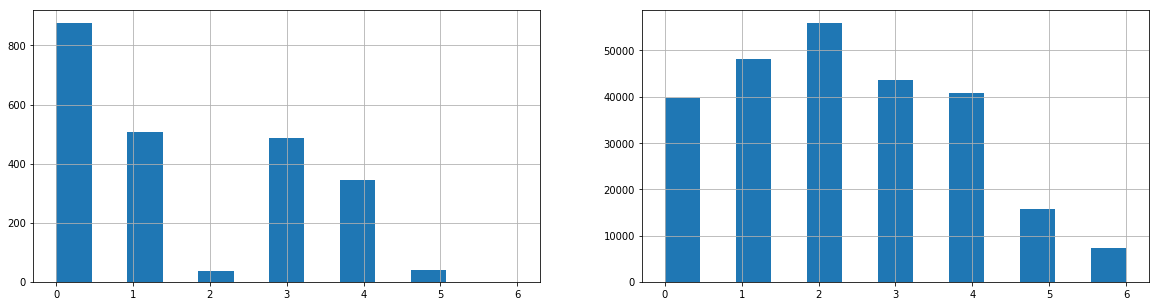

In [35]:
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
train_test_df[train_test_df.target==1].start_weekday.hist(bins=13)
plt.subplot(122)
train_test_df[train_test_df.target==0].start_weekday.hist(bins=13)
plt.show()

In [28]:
with open(os.path.join(PATH_TO_DATA, 'site_dic.pkl'), 'rb') as file :
        try :
            while True:
                site_dict = pickle.load(file)
        except EOFError :
            pass

In [29]:
facebook_ids = []
youtube_ids = []
ytimg_ids = []

for key in list(site_dict.keys()):
    if 'facebook' in key:
        facebook_ids.append(site_dict[key])
    if 'youtube' in key:
        youtube_ids.append(site_dict[key])
    if 'ytimg' in key:
        ytimg_ids.append(site_dict[key])

In [30]:
train_test_df['end_site'] = train_test_df[['site%d' % i for i in range(1, 11)]].agg(lambda x: x[x.notnull()][-1], axis=1)

In [31]:
train_test_df['end_time'] = train_test_df[['time%d' % i for i in range(1, 11)]].agg(lambda x: x[x.notnull()][-1], axis=1)

In [32]:
train_test_df['end_time'] = pd.to_datetime(train_test_df.end_time)

train_test_df['end_year'] = train_test_df.end_time.dt.year
train_test_df['end_month'] = train_test_df.end_time.dt.month
train_test_df['end_hour'] = train_test_df.end_time.dt.hour
train_test_df['end_weekday'] = train_test_df.end_time.dt.weekday

In [36]:
train_test_df['yb_start'] = train_test_df['site1'].apply(lambda x: int(x in youtube_ids))
train_test_df['fb_start'] = train_test_df['site1'].apply(lambda x: int(x in facebook_ids))
train_test_df['yt_start'] = train_test_df['site1'].apply(lambda x: int(x in ytimg_ids))

train_test_df['yb_end'] = train_test_df['end_site'].apply(lambda x: int(x in youtube_ids))
train_test_df['fb_end'] = train_test_df['end_site'].apply(lambda x: int(x in facebook_ids))
train_test_df['yt_end'] = train_test_df['end_site'].apply(lambda x: int(x in ytimg_ids))

train_test_df['duration'] = (train_test_df['end_time'] - train_test_df['time1']).dt.seconds

TypeError: ufunc subtract cannot use operands with types dtype('<M8[ns]') and dtype('O')

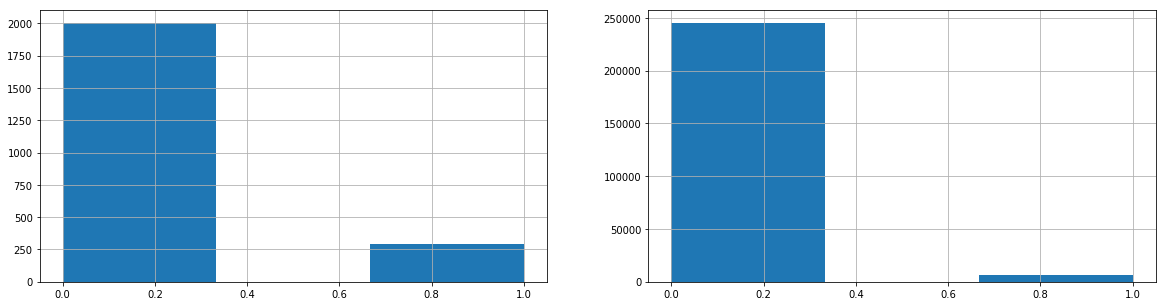

In [42]:
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
train_test_df[train_test_df.target==1].yb_start.hist(bins=3)
plt.subplot(122)
train_test_df[train_test_df.target==0].yb_start.hist(bins=3)
plt.show()

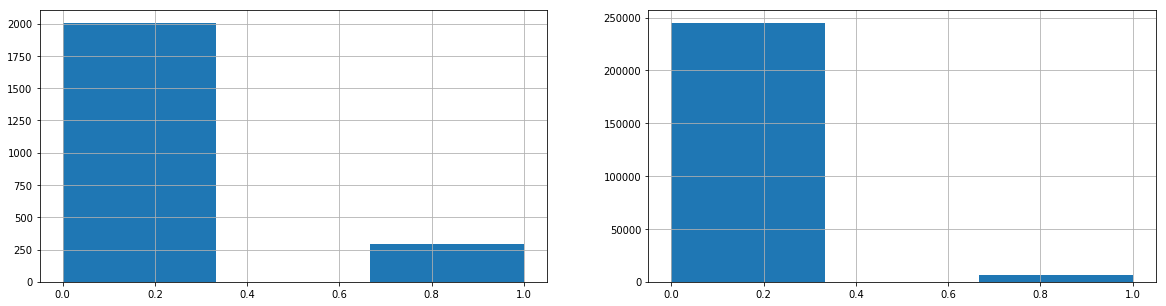

In [43]:
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
train_test_df[train_test_df.target==1].yb_end.hist(bins=3)
plt.subplot(122)
train_test_df[train_test_df.target==0].yb_end.hist(bins=3)
plt.show()

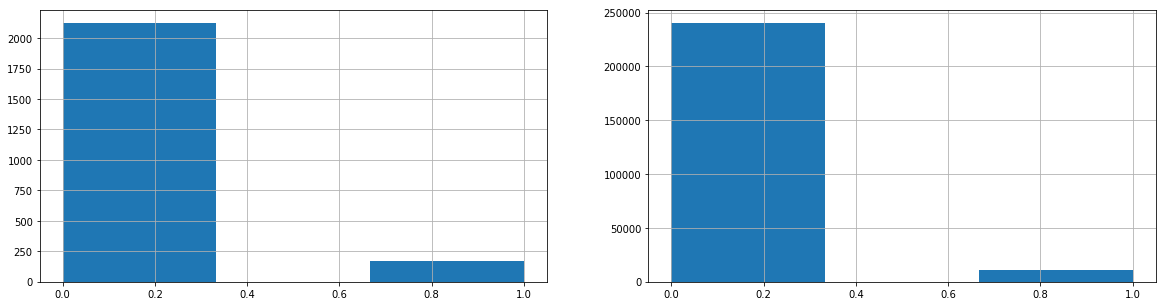

In [44]:
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
train_test_df[train_test_df.target==1].fb_start.hist(bins=3)
plt.subplot(122)
train_test_df[train_test_df.target==0].fb_start.hist(bins=3)
plt.show()

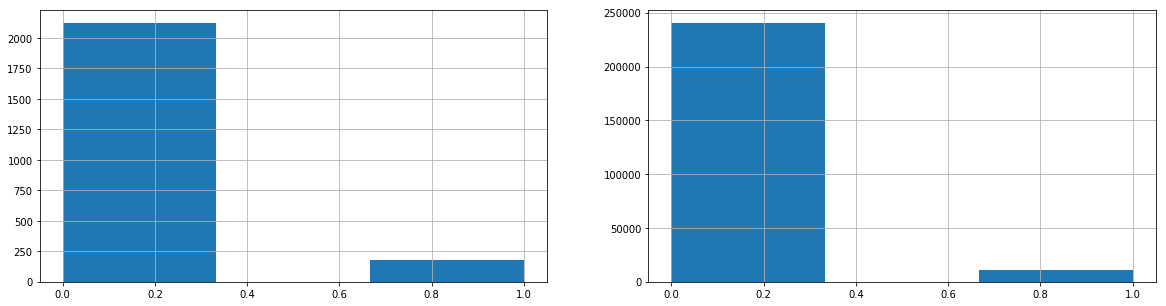

In [45]:
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
train_test_df[train_test_df.target==1].fb_end.hist(bins=3)
plt.subplot(122)
train_test_df[train_test_df.target==0].fb_end.hist(bins=3)
plt.show()

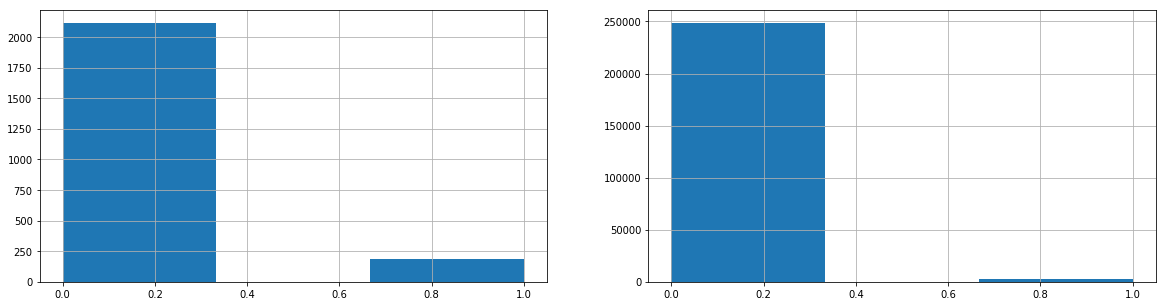

In [46]:
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
train_test_df[train_test_df.target==1].yt_start.hist(bins=3)
plt.subplot(122)
train_test_df[train_test_df.target==0].yt_start.hist(bins=3)
plt.show()

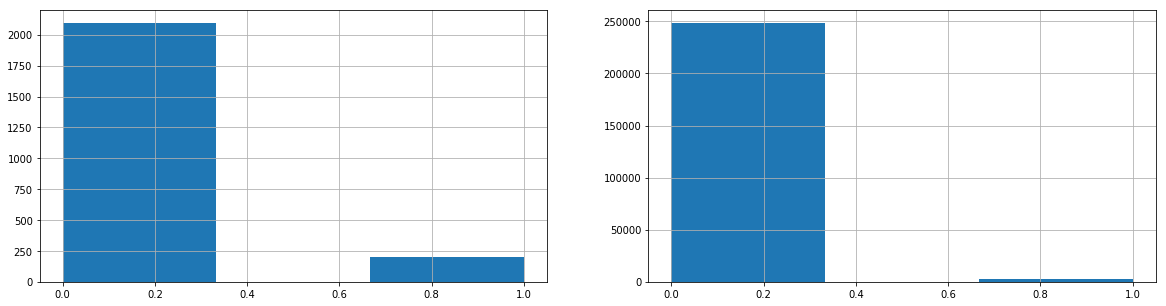

In [47]:
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
train_test_df[train_test_df.target==1].yt_end.hist(bins=3)
plt.subplot(122)
train_test_df[train_test_df.target==0].yt_end.hist(bins=3)
plt.show()

- распределение длительности сессий  экспоненциальное, прологарифмируем:

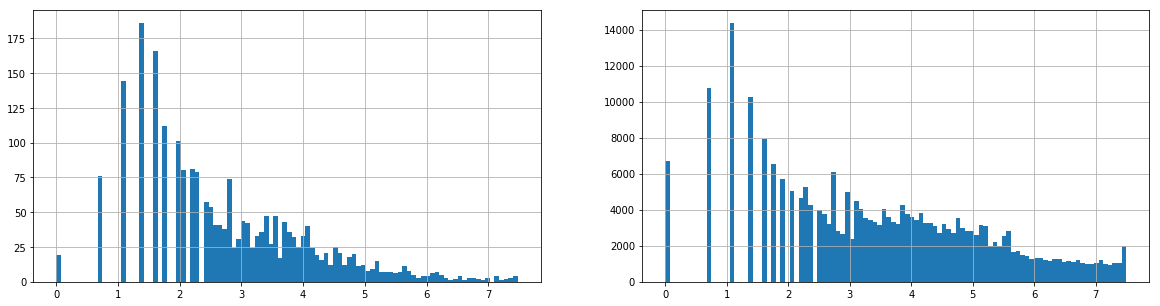

In [48]:
fig = plt.figure(figsize=(20,5))
plt.subplot(121)
np.log1p(train_test_df[train_test_df.target==1].duration).hist(bins=100)
plt.subplot(122)
np.log1p(train_test_df[train_test_df.target==0].duration).hist(bins=100)
plt.show()

In [ ]:
train_test_df['duration'] = np.log1p(train_test_df.duration)

In [ ]:
def long_session(x):
    if x < 0.5:
        return 0
    elif x < 1:
        return 1
    elif x < 2:
        return 2
    elif x < 3:
        return 3
    elif x < 4:
        return 4
    elif x < 5:
        return 5
    elif x < 6:
        return 6
    elif x < 7:
        return 7
    return 8

In [ ]:
train_test_df['duration'] = train_test_df.duration.apply(long_session)

In [37]:
columns_to_train = ['n_unique', 'start_year', 'start_month', 'start_hour', 'start_weekday', 
                    'end_year', 'end_month', 'end_hour', 'end_weekday', 'duration', 
                    'yb_start', 'fb_start', 'yt_start', 'yb_end', 'fb_end', 'yt_end']

In [38]:
columns_to_train = ['start_month', 'start_hour', 'start_weekday', 
                    'end_month', 'end_hour', 'end_weekday', 'duration', 
                    'yb_start', 'fb_start', 'yb_end', 'fb_end']

In [46]:
X_add = pd.get_dummies(train_test_df['end_year'], columns='end_year')

In [55]:
X_train = hstack([X_train_sparse, X_add[:train_df.shape[0]]])
X_test = hstack([X_test_sparse, X_add[train_df.shape[0]:]])

- оценим качество по кросс-валидации:

In [56]:
logit = LogisticRegression(n_jobs=-1, random_state=42)
score = cross_val_score(estimator=logit, X=X_train, y=y, cv=skf, scoring='roc_auc').mean()
print('ROC AUC score: ', round(score, 4))

ROC AUC score:  0.989


In [77]:
sgd = SGDClassifier(loss='log', class_weight={0:1, 1:10}, alpha=1e-4, random_state=17, n_jobs=-1, tol=1e-6)
score = cross_val_score(estimator=sgd, X=X_train, y=y, cv=skf, scoring='roc_auc').mean()
print('ROC AUC score: ', round(score, 4))

ROC AUC score:  0.9888


In [58]:
def write_to_submission_file(predicted_labels,
                             target='target', index_label="session_id", n_submit=4):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(os.path.join(PATH_TO_DATA, f'submit_{n_submit:03d}.csv'), index_label=index_label)

In [59]:
logit.fit(X_train, y)
y_pred = logit.predict_proba(X_test)

In [60]:
logit.fit(X_train, y)
y_pred = logit.predict_proba(X_test)

In [61]:
write_to_submission_file(y_pred[:, 1], n_submit=6)

- бенчмарк "Logit +3 features" на публичной части рейтинга в соревновании Kaggle побит: score 0.94666